In [1]:
import tqdm
import pickle
from financialml import clustering, featureimportance
from sklearn.cluster import KMeans

In [3]:
# CONSTANTS:
ROUND = '221'
TOURNAMENT_NAME = "kazutsugi"
target_name = f"target_{TOURNAMENT_NAME}"
predictin_name = f"prediction_{TOURNAMENT_NAME}"

In [4]:
# Load Data
training_data = pd.read_hdf(f"../../dataset/numerai_dataset_{ROUND}/numerai_training_data.hdf").set_index("id")

In [5]:
# Load Data
tournament_data = pd.read_hdf(f"../../dataset/numerai_dataset_{ROUND}/numerai_tournament_data.hdf").set_index("id")

In [6]:
training_data.head(1)

,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,feature_charisma26,feature_charisma27,feature_charisma28,feature_charisma29,feature_charisma30,feature_charisma31,feature_charisma32,feature_charisma33,feature_charisma34,feature_charisma35,feature_charisma36,feature_charisma37,feature_charisma38,feature_charisma39,feature_charisma40,feature_charisma41,feature_charisma42,feature_charisma43,feature_charisma44,feature_charisma45,feature_charisma46,feature_charisma47,feature_charisma48,feature_charisma49,feature_charisma50,feature_charisma51,feature_charisma52,feature_charisma53,feature_charisma54,feature_charisma55,feature_charisma56,feature_charisma57,feature_charisma58,feature_charisma59,feature_charisma60,feature_charisma61,feature_charisma62,feature_charisma63,feature_charisma64,feature_charisma65,feature_charisma66,feature_charisma67,feature_charisma68,feature_charisma69,feature_charisma70,feature_charisma71,feature_charisma72,feature_charisma73,feature_charisma74,feature_charisma75,feature_charisma76,feature_charisma77,feature_charisma78,feature_charisma79,feature_charisma80,feature_charisma81,feature_charisma82,feature_charisma83,feature_charisma84,feature_charisma85,feature_charisma86,feature_strength1,feature_strength2,feature_strength3,feature_strength4,feature_strength5,feature_strength6,feature_strength7,feature_strength8,feature_strength9,feature_strength10,feature_strength11,feature_strength12,feature_strength13,feature_strength14,feature_strength15,feature_strength16,feature_strength17,feature_strength18,feature_strength19,feature_strength20,feature_strength21,feature_strength22,feature_strength23,feature_strength24,feature_strength25,feature_strength26,feature_strength27,feature_strength28,feature_strength29,feature_strength30,feature_strength31,feature_strength32,feature_strength33,feature_strength34,feature_strength35,feature_strength36,feature_strength37,feature_strength38,feature_dexterity1,feature_dexterity2,feature_dexterity3,feature_dexterity4,feature_dexterity5,feature_dexterity6,feature_dexterity7,feature_dexterity8,feature_dexterity9,feature_dexterity10,feature_dexterity11,feature_dexterity12,feature_dexterity13,feature_dexterity14,feature_constitution1,feature_constitution2,feature_constitution3,feature_constitution4,feature_constitution5,feature_constitution6,feature_constitution7,feature_constitution8,feature_constitution9,feature_constitution10,feature_constitution11,feature_constitution12,feature_constitution13,feature_constitution14,feature_constitution15,feature_constitution16,feature_constitution17,feature_constitution18,feature_constitution19,feature_constitution20,feature_constitution21,feature_constitution22,feature_constitution23,feature_constitution24,feature_constitution25,feature_constitution26,feature_constitution27,feature_constitution28,feature_constitution29,feature_constitution30,feature_constitution31,feature_constitution32,feature_constitution33,feature_constitution34,feature_constitution35,feature_constitution36,feature_constitution37,feature_constitution38,feature_constitution39,feature_constitution40,feature_constitution41,feature_constitution42,feature_constitution43,feature_constitution44,feature_constitution45,feature_constitution46,feature_constitution47,feature_constitution48,feature_consti

In [7]:
tournament_data.tail(1)

,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,feature_charisma26,feature_charisma27,feature_charisma28,feature_charisma29,feature_charisma30,feature_charisma31,feature_charisma32,feature_charisma33,feature_charisma34,feature_charisma35,feature_charisma36,feature_charisma37,feature_charisma38,feature_charisma39,feature_charisma40,feature_charisma41,feature_charisma42,feature_charisma43,feature_charisma44,feature_charisma45,feature_charisma46,feature_charisma47,feature_charisma48,feature_charisma49,feature_charisma50,feature_charisma51,feature_charisma52,feature_charisma53,feature_charisma54,feature_charisma55,feature_charisma56,feature_charisma57,feature_charisma58,feature_charisma59,feature_charisma60,feature_charisma61,feature_charisma62,feature_charisma63,feature_charisma64,feature_charisma65,feature_charisma66,feature_charisma67,feature_charisma68,feature_charisma69,feature_charisma70,feature_charisma71,feature_charisma72,feature_charisma73,feature_charisma74,feature_charisma75,feature_charisma76,feature_charisma77,feature_charisma78,feature_charisma79,feature_charisma80,feature_charisma81,feature_charisma82,feature_charisma83,feature_charisma84,feature_charisma85,feature_charisma86,feature_strength1,feature_strength2,feature_strength3,feature_strength4,feature_strength5,feature_strength6,feature_strength7,feature_strength8,feature_strength9,feature_strength10,feature_strength11,feature_strength12,feature_strength13,feature_strength14,feature_strength15,feature_strength16,feature_strength17,feature_strength18,feature_strength19,feature_strength20,feature_strength21,feature_strength22,feature_strength23,feature_strength24,feature_strength25,feature_strength26,feature_strength27,feature_strength28,feature_strength29,feature_strength30,feature_strength31,feature_strength32,feature_strength33,feature_strength34,feature_strength35,feature_strength36,feature_strength37,feature_strength38,feature_dexterity1,feature_dexterity2,feature_dexterity3,feature_dexterity4,feature_dexterity5,feature_dexterity6,feature_dexterity7,feature_dexterity8,feature_dexterity9,feature_dexterity10,feature_dexterity11,feature_dexterity12,feature_dexterity13,feature_dexterity14,feature_constitution1,feature_constitution2,feature_constitution3,feature_constitution4,feature_constitution5,feature_constitution6,feature_constitution7,feature_constitution8,feature_constitution9,feature_constitution10,feature_constitution11,feature_constitution12,feature_constitution13,feature_constitution14,feature_constitution15,feature_constitution16,feature_constitution17,feature_constitution18,feature_constitution19,feature_constitution20,feature_constitution21,feature_constitution22,feature_constitution23,feature_constitution24,feature_constitution25,feature_constitution26,feature_constitution27,feature_constitution28,feature_constitution29,feature_constitution30,feature_constitution31,feature_constitution32,feature_constitution33,feature_constitution34,feature_constitution35,feature_constitution36,feature_constitution37,feature_constitution38,feature_constitution39,feature_constitution40,feature_constitution41,feature_constitution42,feature_constitution43,feature_constitution44,feature_constitution45,feature_constitution46,feature_constitution47,feature_constitution48,feature_consti

In [8]:
features = [c for c in training_data if c.startswith("feature")]

---

## 1. ERA毎にFeatureのクラスタリング(Feature-Feature間の依存関係の確認)

EraによってFeature間の依存関係は変わるのだろうか? Era毎にFeatureの相関行列を基にしたクラスタリングを行いクラスタの推移を観察する

In [9]:
data = training_data[features]
corr = training_data.corr()

In [35]:
# era毎にloop
result = {}
for era in tqdm.tqdm(training_data.era.unique()):
    data_ = training_data.query("era == @era")[features]
    corr = data_.corr()
    result[era] = clustering.clusterKMeansBase(corr, maxNumClusters=100)

100%|██████████| 120/120 [4:08:31<00:00, 124.26s/it] 


In [12]:
len(result)  # [corrMat, cluster, score] in each era

120

In [41]:
# save
# with open('FeatureClusterByEra.pkl', 'wb') as f:
#     pickle.dump(result, f)

In [9]:
# load
# with open('FeatureClusterByEra.pkl', 'rb') as f:
#     result = pickle.load(f)

In [54]:
n_clusters = np.array([len(res[1]) for res in result.values()])

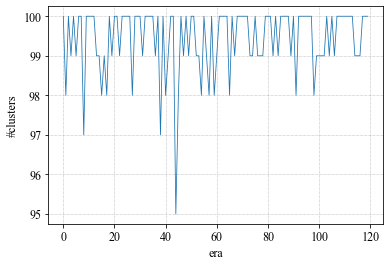

In [59]:
plt.plot(n_clusters)
plt.xlabel("era");
plt.ylabel("#clusters");

cluster数は上限に設定した100に近い.  
Feature間の相関はeraによってあまり変化しない...?

---
## 2. ERA毎に各FeatureのMDIを計測(Feature-Return間の依存関係の確認)

各Eraで各FeatureのMDIを計算することで、[#Era, #Feature] のmatrixを得る。どのFeatureが効くかは時系列でどう変化する?

In [57]:
# era毎にloop
mdi_list = []
for era in tqdm.tqdm(training_data.era.unique()):
    data_ = training_data.query("era == @era")[features+[target_name]]
    mdi = featureimportance.calculateMDI(X=data_[features], y=data_[target_name].astype(str))
    mdi_list.append(mdi)

100%|██████████| 120/120 [16:34<00:00,  8.29s/it]


In [58]:
# save
# with open('FeatureMDIByEra.pkl', 'wb') as f:
#     pickle.dump(mdi_list, f)

In [24]:
# load
# with open('FeatureMDIByEra.pkl', 'rb') as f:
#     mdi_list = pickle.load(f)

MDIのHeatmap[time, feature]  


In [25]:
pd.concat([df[["mean"]] for df in mdi_list], axis=1)

,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
feature_intelligence1,0.003599,0.003619,0.003623,0.003664,0.003617,0.003602,0.003626,0.003467,0.003507,0.003454,0.003449,0.003553,0.003528,0.003704,0.003563,0.003344,0.003618,0.003510,0.003732,0.003530,0.003578,0.003657,0.003383,0.003363,0.003400,0.003586,0.003559,0.003562,0.003533,0.003727,0.003553,0.003374,0.003604,0.003612,0.003550,0.003755,0.003454,0.003587,0.003548,0.003579,0.003677,0.003576,0.003492,0.003566,0.003537,0.003581,0.003591,0.003475,0.003471,0.003646,0.003636,0.003488,0.003475,0.003692,0.003496,0.003654,0.003549,0.003513,0.003566,0.003474,0.003561,0.003542,0.003623,0.003640,0.003553,0.003790,0.003438,0.003587,0.003344,0.003571,0.003497,0.003507,0.003555,0.003564,0.003586,0.003514,0.003441,0.003384,0.003483,0.003715,0.003579,0.003404,0.003466,0.003391,0.003548,0.003579,0.003560,0.003486,0.003595,0.003421,0.003594,0.003586,0.003570,0.003639,0.003680,0.003559,0.003522,0.003487,0.003548,0.003548,0.003444,0.003501,0.003508,0.003404,0.003660,0.003567,0.003669,0.003675,0.003514,0.003485,0.003556,0.003621,0.003490,0.003439,0.003593,0.003552,0.003466,0.003612,0.003569,0.003672
feature_intelligence2,0.003317,0.003429,0.003198,0.003252,0.003380,0.003406,0.003292,0.003362,0.003358,0.003344,0.003268,0.003314,0.003299,0.003325,0.003243,0.003293,0.003270,0.003280,0.003355,0.003186,0.003210,0.003337,0.003332,0.003295,0.003360,0.003263,0.003267,0.003196,0.003282,0.003244,0.003273,0.003227,0.003234,0.003251,0.003151,0.003163,0.003266,0.003219,0.003152,0.003174,0.003261,0.003312,0.003154,0.003297,0.003262,0.003133,0.003293,0.003232,0.003167,0.003183,0.003182,0.003154,0.003337,0.003210,0.003289,0.003191,0.003197,0.003236,0.003135,0.003118,0.003225,0.003244,0.003329,0.003211,0.003228,0.003156,0.003264,0.003219,0.003171,0.003335,0.003377,0.003295,0.003314,0.003310,0.003229,0.003260,0.003301,0.003303,0.003271,0.003282,0.003327,0.003208,0.003311,0.003213,0.003294,0.003211,0.003292,0.003299,0.003202,0.003261,0.003257,0.003268,0.003189,0.003307,0.003237,0.003242,0.003240,0.003206,0.003215,0.003303,0.003288,0.003179,0.003174,0.003204,0.003176,0.003141,0.003160,0.003133,0.003308,0.003332,0.003220,0.003166,0.003300,0.003224,0.003229,0.003147,0.003272,0.003253,0.003109,0.003173
feature_intelligence3,0.003372,0.003431,0.003464,0.003331,0.003259,0.003286,0.003494,0.003354,0.003405,0.003266,0.003378,0.003377,0.003379,0.003262,0.003223,0.003283,0.003316,0.003286,0.003433,0.003160,0.003398,0.003276,0.003382,0.003262,0.003261,0.003250,0.003236,0.003377,0.003306,0.003256,0.003285,0.003275,0.003149,0.003080,0.003186,0.003180,0.003222,0.003213,0.003235,0.003255,0.003301,0.003189,0.003282,0.003304,0.003352,0.003231,0.003195,0.003226,0.003291,0.003234,0.003261,0.003243,0.003202,0.003148,0.003209,0.003236,0.003149,0.003150,0.003179,0.003070,0.003273,0.003252,0.003285,0.003282,0.003256,0.003261,0.003229,0.003298,0.003190,0.003200,0.003285,0.003250,0.003320,0.003480,0.003362,0.003291,0.003243,0.003243,0.003378,0.003217,0.003242,0.003258,0.003245,0.003188,0.003218,0.003233,0.003254,0.003192,0.003277,0.003184,0.003163,0.003265,0.003277,0.003205,0.003189,0.003158,0.003183,0.003245,0.003188,0.003211,0.003169,0.003233,0.003192,0.003200,0.003153,0.003184,0.003249,0.003399,0.003249,0.003256,0.003211,0.003287,0.003162,0.003182,0.003293,0.003172,0.003174,0.003171,0.003243,0.003132
feature_intelligence4,0.003829,0.003690,0.003817,0.003632,0.003711,0.003741,0.003885,0.003863

In [26]:
pd.concat([df[["std"]] for df in mdi_list], axis=1)

,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std,std
feature_intelligence1,0.000079,0.000072,0.000073,0.000072,0.000069,0.000065,0.000070,0.000065,0.000058,0.000060,0.000063,0.000065,0.000066,0.000072,0.000063,0.000061,0.000062,0.000060,0.000080,0.000065,0.000062,0.000067,0.000056,0.000054,0.000055,0.000061,0.000059,0.000067,0.000060,0.000066,0.000060,0.000057,0.000058,0.000062,0.000064,0.000065,0.000054,0.000058,0.000056,0.000058,0.000061,0.000056,0.000060,0.000062,0.000060,0.000056,0.000058,0.000055,0.000055,0.000067,0.000057,0.000054,0.000050,0.000059,0.000052,0.000056,0.000053,0.000052,0.000056,0.000054,0.000056,0.000055,0.000065,0.000062,0.000058,0.000066,0.000056,0.000059,0.000051,0.000060,0.000057,0.000062,0.000063,0.000064,0.000067,0.000057,0.000056,0.000054,0.000065,0.000062,0.000053,0.000048,0.000058,0.000055,0.000053,0.000060,0.000059,0.000057,0.000059,0.000053,0.000059,0.000062,0.000060,0.000065,0.000072,0.000055,0.000056,0.000050,0.000057,0.000058,0.000055,0.000056,0.000055,0.000051,0.000069,0.000063,0.000066,0.000074,0.000063,0.000057,0.000059,0.000058,0.000055,0.000055,0.000061,0.000064,0.000054,0.000055,0.000061,0.000068
feature_intelligence2,0.000063,0.000067,0.000063,0.000059,0.000060,0.000061,0.000057,0.000058,0.000057,0.000056,0.000055,0.000054,0.000053,0.000053,0.000051,0.000050,0.000053,0.000054,0.000053,0.000051,0.000051,0.000051,0.000051,0.000050,0.000049,0.000049,0.000048,0.000050,0.000048,0.000048,0.000048,0.000049,0.000049,0.000048,0.000046,0.000049,0.000049,0.000047,0.000043,0.000046,0.000046,0.000047,0.000046,0.000045,0.000049,0.000046,0.000050,0.000045,0.000046,0.000044,0.000045,0.000043,0.000044,0.000045,0.000045,0.000043,0.000045,0.000046,0.000043,0.000042,0.000045,0.000045,0.000049,0.000044,0.000045,0.000045,0.000046,0.000047,0.000045,0.000049,0.000052,0.000052,0.000054,0.000054,0.000053,0.000051,0.000047,0.000047,0.000048,0.000048,0.000047,0.000046,0.000045,0.000047,0.000047,0.000046,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000045,0.000046,0.000043,0.000044,0.000045,0.000043,0.000044,0.000044,0.000045,0.000046,0.000049,0.000049,0.000050,0.000049,0.000045,0.000046,0.000047,0.000045,0.000049,0.000046,0.000046,0.000048,0.000047,0.000044
feature_intelligence3,0.000064,0.000066,0.000067,0.000061,0.000058,0.000058,0.000064,0.000062,0.000067,0.000054,0.000057,0.000057,0.000057,0.000055,0.000050,0.000054,0.000054,0.000052,0.000056,0.000053,0.000056,0.000052,0.000055,0.000051,0.000049,0.000050,0.000051,0.000051,0.000051,0.000047,0.000049,0.000049,0.000046,0.000045,0.000047,0.000047,0.000047,0.000046,0.000049,0.000046,0.000048,0.000047,0.000052,0.000049,0.000050,0.000046,0.000045,0.000048,0.000046,0.000047,0.000043,0.000043,0.000044,0.000043,0.000044,0.000045,0.000044,0.000044,0.000045,0.000042,0.000048,0.000047,0.000051,0.000049,0.000045,0.000046,0.000045,0.000051,0.000047,0.000050,0.000052,0.000054,0.000056,0.000056,0.000056,0.000052,0.000047,0.000046,0.000052,0.000048,0.000047,0.000049,0.000046,0.000046,0.000048,0.000046,0.000046,0.000046,0.000047,0.000045,0.000044,0.000046,0.000047,0.000047,0.000048,0.000045,0.000044,0.000044,0.000043,0.000043,0.000045,0.000046,0.000045,0.000043,0.000048,0.000049,0.000052,0.000055,0.000048,0.000046,0.000045,0.000046,0.000046,0.000046,0.000052,0.000048,0.000049,0.000047,0.000047,0.000046
feature_intelligence4,0.000087,0.000081,0.000084,0.000078,0.000078,0.000085,0.000088,0.000089,0.000082,0.000062,0.000065,0.000076,0.000076,0.000073,0.000062,0.000056,0.000067,0.000061,0.000077,0.000076,0.000082,0.

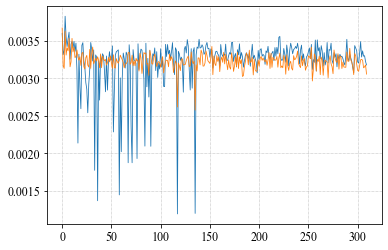

In [27]:
# era1とera-1だけ比較
plt.plot(mdi_list[0]["mean"].values)
plt.plot(mdi_list[-1]["mean"].values);

平均的なimportanceは安定しているように見える一方、  
前半のfeatureには全然効かないやつがある  

In [28]:
# heatmapで時系列確認
heatmap = pd.concat([df[["mean"]] for df in mdi_list], axis=1)
heatmap.columns = training_data.era.unique()

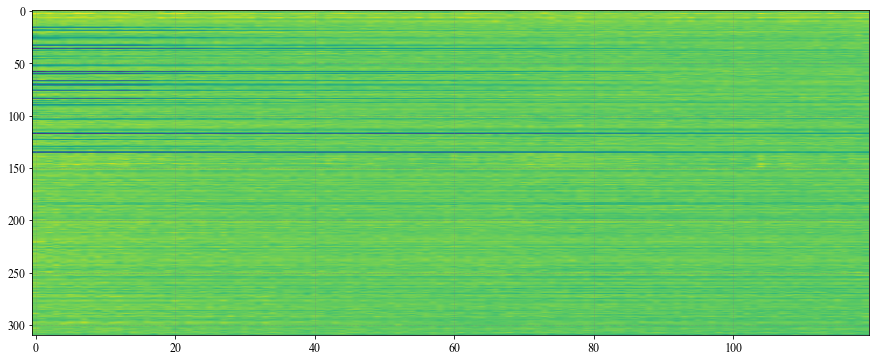

In [29]:
plt.figure(figsize=(15,10))
plt.imshow(heatmap.values, aspect=0.15, vmin=heatmap.values.min(), vmax=heatmap.values.max());

横軸era 縦軸feature.  

- featureの中には前半振るわない奴がありそう  
- era100~110, feature140=150付近、やけに効く部分がある

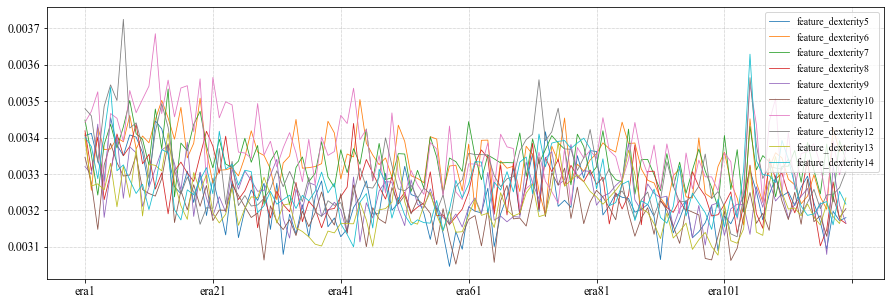

In [199]:
heatmap.iloc[140:150].T.plot(figsize=(15,5))

dexterity系っぽい. dex系は価格系指標. コロナ相場での急落と関係しているというUKI氏の言が思い出される.

---
### 2.1 平均MDIのmean, skew, kurtが上位/下位のFeatureを見てみる

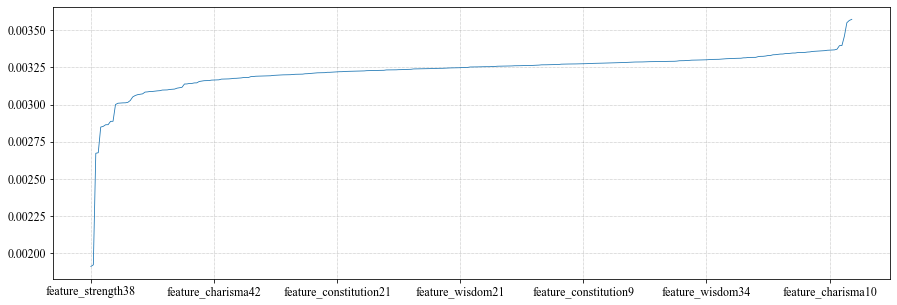

In [117]:
# 各Featureの平均的なimportance
heatmap.mean(axis=1).sort_values().plot(figsize=(15,5));

In [119]:
# 平均上位のFeature
heatmap.mean(axis=1).sort_values().to_frame().tail(10).T

,feature_charisma10,feature_dexterity11,feature_intelligence5,feature_constitution53,feature_intelligence7,feature_intelligence6,feature_intelligence11,feature_intelligence1,feature_intelligence4,feature_intelligence8
0,0.003366,0.003366,0.003368,0.003373,0.003396,0.003397,0.00346,0.003551,0.003566,0.003573


In [115]:
# 平均下位のfeature
heatmap.mean(axis=1).sort_values().to_frame().head(15).T

,feature_strength38,feature_strength20,feature_charisma47,feature_charisma25,feature_charisma22,feature_charisma60,feature_charisma65,feature_charisma56,feature_charisma73,feature_charisma49,feature_charisma77,feature_strength6,feature_strength17,feature_charisma27,feature_charisma15
0,0.001911,0.001921,0.002672,0.002676,0.002849,0.002853,0.002864,0.002865,0.002887,0.002887,0.003,0.003009,0.00301,0.003011,0.003012


- 平均上位のFeatureはintelligenceが多い  
- 平均下位のFeatureはstrengthおよびcharismaが多い模様

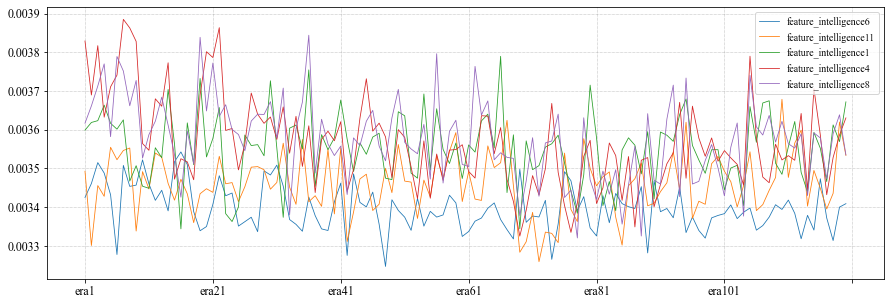

In [160]:
# 平均上位の時系列
heatmap.loc[heatmap.mean(axis=1).sort_values().to_frame().tail().index].T.plot(figsize=(15,5));

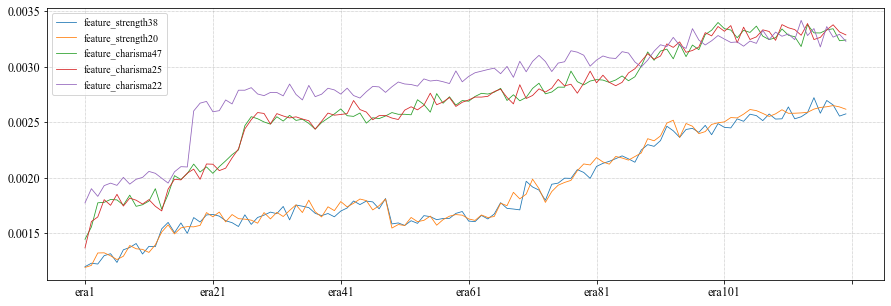

In [159]:
# 平均下位の時系列
heatmap.loc[heatmap.mean(axis=1).sort_values().to_frame().head().index].T.plot(figsize=(15,5));

上位は比較的安定して効いているようだが, 下位は最近になって効いてきたファクターが多そう.  
昔冴えなかったのでmeanを取ると下位になってしまう

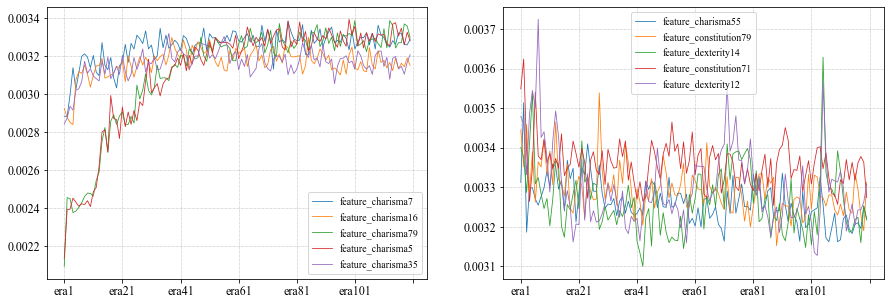

In [188]:
# importanceのskewの上位下位 ... 急上昇/急下降傾向のあるFeature
fig,ax = plt.subplots(1,2, figsize=(15,5))
heatmap.loc[heatmap.T.skew().sort_values().head().index].T.plot(ax=ax[0]);  # 上昇
heatmap.loc[heatmap.T.skew().sort_values().tail().index].T.plot(ax=ax[1]);  # 下降

charismaは上昇傾向 ... 平均でみると下位だったfeature  
dexやconsticutionはimportanceが下降傾向

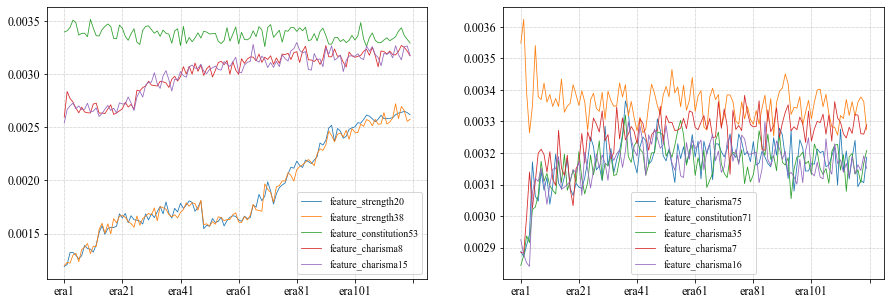

In [189]:
# importanceのkurtの上位下位 ... 不安定,安定なFeature候補
fig,ax = plt.subplots(1,2, figsize=(15,5))
heatmap.loc[heatmap.T.kurt().sort_values().head().index].T.plot(ax=ax[0])  # 広い
heatmap.loc[heatmap.T.kurt().sort_values().tail().index].T.plot(ax=ax[1]); # 鋭い

---
### 2.2 MDIによるEraのクラスタリング  
各eraはfeature毎にMDIを持っている. Kmeansにこれの相関行列を渡すことでeraのclusteringを行う.

In [33]:
heatmap.corr()

,era1,era2,era3,era4,era5,era6,era7,era8,era9,era10,era11,era12,era13,era14,era15,era16,era17,era18,era19,era20,era21,era22,era23,era24,era25,era26,era27,era28,era29,era30,era31,era32,era33,era34,era35,era36,era37,era38,era39,era40,era41,era42,era43,era44,era45,era46,era47,era48,era49,era50,era51,era52,era53,era54,era55,era56,era57,era58,era59,era60,era61,era62,era63,era64,era65,era66,era67,era68,era69,era70,era71,era72,era73,era74,era75,era76,era77,era78,era79,era80,era81,era82,era83,era84,era85,era86,era87,era88,era89,era90,era91,era92,era93,era94,era95,era96,era97,era98,era99,era100,era101,era102,era103,era104,era105,era106,era107,era108,era109,era110,era111,era112,era113,era114,era115,era116,era117,era118,era119,era120
era1,1.000000,0.958290,0.954350,0.952368,0.957535,0.954624,0.956082,0.947869,0.949504,0.954439,0.955118,0.952480,0.949093,0.936648,0.932969,0.935123,0.922391,0.899665,0.906412,0.906095,0.884926,0.901953,0.898520,0.901653,0.885690,0.873658,0.857172,0.828900,0.836857,0.847290,0.857995,0.851473,0.822207,0.839241,0.849820,0.831731,0.837809,0.826209,0.812742,0.797182,0.795214,0.774943,0.811063,0.802019,0.808954,0.805998,0.800590,0.798844,0.788921,0.790268,0.759911,0.777368,0.754271,0.756986,0.762653,0.753972,0.746045,0.740341,0.728962,0.737895,0.770899,0.720956,0.732216,0.710540,0.688931,0.687204,0.720129,0.715131,0.678539,0.689687,0.695843,0.660628,0.682005,0.648103,0.615428,0.647157,0.609554,0.629756,0.619784,0.631858,0.621393,0.573575,0.615290,0.602161,0.572398,0.620721,0.550761,0.570703,0.571015,0.534407,0.449227,0.416421,0.386101,0.434734,0.459181,0.370927,0.442281,0.415801,0.354776,0.291872,0.351511,0.367999,0.373005,0.310226,0.352819,0.353835,0.333916,0.373739,0.367691,0.339855,0.281909,0.333771,0.304666,0.267043,0.279464,0.328370,0.260912,0.267430,0.295319,0.319829
era2,0.958290,1.000000,0.955233,0.956432,0.955133,0.955501,0.953405,0.947320,0.953159,0.955972,0.953749,0.952101,0.957170,0.941333,0.945949,0.941853,0.930339,0.905412,0.910786,0.906694,0.894177,0.903758,0.905611,0.904173,0.886274,0.880272,0.866769,0.846293,0.853714,0.864908,0.870706,0.863765,0.837540,0.848764,0.858383,0.847707,0.860293,0.845228,0.828951,0.819779,0.808622,0.802044,0.829439,0.819120,0.826990,0.834839,0.824606,0.824126,0.801999,0.809808,0.778801,0.798091,0.788369,0.786757,0.784093,0.772980,0.766009,0.761304,0.761081,0.757227,0.792288,0.746881,0.756329,0.731759,0.706425,0.705301,0.742132,0.742871,0.705494,0.715881,0.721098,0.685907,0.707003,0.671266,0.643540,0.670294,0.636206,0.652076,0.641595,0.652595,0.648615,0.603397,0.642733,0.626423,0.598097,0.643045,0.591419,0.601909,0.595451,0.559471,0.477759,0.438598,0.403629,0.449665,0.469551,0.394269,0.452641,0.439165,0.389291,0.317152,0.367449,0.381545,0.396880,0.328764,0.354493,0.367130,0.360279,0.386712,0.383510,0.359035,0.299776,0.345025,0.322974,0.287449,0.296053,0.340738,0.294313,0.284730,0.307869,0.314277
era3,0.954350,0.955233,1.000000,0.950112,0.957544,0.957482,0.954670,0.953272,0.958647,0.954171,0.952137,0.956329,0.946394,0.940331,0.941758,0.940593,0.925588,0.905655,0.910264,0.909581,0.897983,0.902013,0.903400,0.900739,0.886545,0.879180,0.872957,0.853104,0.856067,0.870820,0.867048,0.869530,0.844658,0.850169,0.861020,0.852055,0.861213,0.840567,0.837919,0.831225,0.822259,0.807815,0.833999,0.832826,0.830785,0.831068,0.829500,0.816413,0.810326,0.815015,0.781985,0.799234,0.779331,0.777338,0.783538,0.777856,0.766617,0.763027,0.753701,0.753056,0.788522,0.746737,0.759925,0.740156,0.711517,0.721138,0.730761,0.740548,0.706729,0.710794,0.721826,0.681260,0.700334,0.671895,0.648826,0.678872,0.634811,0.650785,0.637923,0.662589,0.640333,0.604482,0.647489,0.634631,0.598108,0.650313,0.590731,0.602972,0.598377,0.570463,0.487402,0.439829,0.421020,0.459232,0.481895,0.391392,0.465449,0.447225,0.404596,0.337327,0.388492,0.409732,0.404073,0.321762,0.364143,0.383496,0.367925,0.423947,0.394857,0.364435,0.311622,0.360837,0.336376,0.287727,0.314452,0.364086,0.294993,0.316557,0.339450,0.341457
era4,0.95236

In [40]:
eraClusterResult = clustering.clusterKMeansBase(heatmap.corr(), maxNumClusters=10)

In [42]:
len(eraClusterResult[1])

2

In [52]:
eraClusterResult[1][1]

['era75',
 'era77',
 'era78',
 'era79',
 'era80',
 'era81',
 'era82',
 'era83',
 'era84',
 'era85',
 'era86',
 'era87',
 'era88',
 'era89',
 'era90',
 'era91',
 'era92',
 'era93',
 'era94',
 'era95',
 'era96',
 'era97',
 'era98',
 'era99',
 'era100',
 'era101',
 'era102',
 'era103',
 'era104',
 'era105',
 'era106',
 'era107',
 'era108',
 'era109',
 'era110',
 'era111',
 'era112',
 'era113',
 'era114',
 'era115',
 'era116',
 'era117',
 'era118',
 'era119',
 'era120']

In [50]:
np.diff([int(elem[3:]) for elem in eraClusterResult[1][0]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2])

クラスタ0は連続

In [49]:
np.diff([int(elem[3:]) for elem in eraClusterResult[1][1]])

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

クラウタ1も連続

MDI基準でみるとera75以前/以降で綺麗に2分されて見える.  
**era75以降でtrainするとtournament_dataでのscoreが上がる可能性があるかも?**